<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Reto/Entrega2/Reto_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

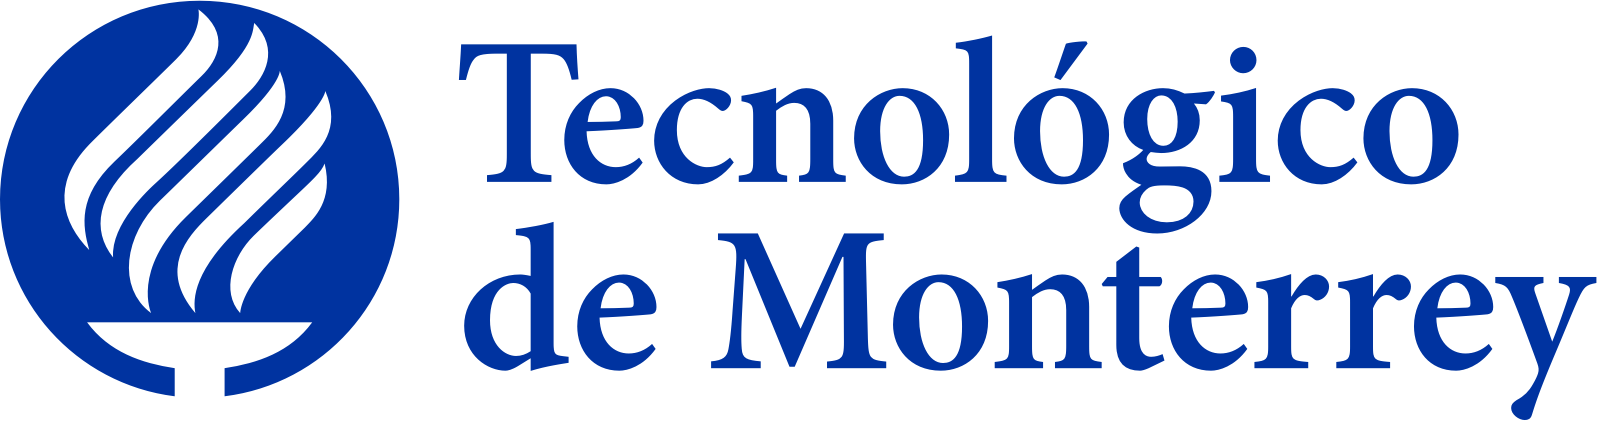

* Nombre de la entrega: Reto Entrega 2: Clasificación-ensambles y presentación ejecutiva
* Francisco Medellin Zertuche - A01794044
* Roberto Romero Vielma - A00822314 
* Materia:  Ciencia y analítica de datos
* Profesora titular: María de la Paz Rico Fernández
* Profesor tutor: Roberto Antonio Guevara González.
* Fecha: 18/11/2022




#Instrucciones

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
  - Decision trees
  - Random Forest.
- Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
- Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y




# Elegir una base de datos, ya sea la de aguas superficiales o la de aguas subterráneas.

El dataset a utilizar es el de aguas subterráneas, dado que presenta una mayor cantidad de datos diferentes a **NaN** en comparación al dataset de aguas superficiales, lo que nos puede ayudar para tener mejores predicciones, a la hora de usar modelos de machine learning.



# Limpieza de base de datos

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-48/main/Reto/Entrega1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
dfsw=pd.read_csv(file,encoding = "ISO-8859-1")

In [2]:
pd.set_option("display.max_columns",None) #mostramos todas las columnas
dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Obtenemos la proporción de cada clase de la variable semáforo

In [61]:
dfsw["SEMAFORO"].value_counts()/len(dfsw)

Verde       0.406367
Rojo        0.362360
Amarillo    0.231273
Name: SEMAFORO, dtype: float64

Eliminamos el signo ${<}$ de todas las variables ordinales por motivos de practicidad

In [3]:
to_numeric=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in to_numeric:
  dfsw[i] = dfsw[i].astype("str")
  dfsw[i] = dfsw[i].str.replace("<","0")
  dfsw[i]= dfsw[i].astype("float")

Verificamos cuantos datos vacíos tiene nuestro dataframe

In [4]:
dfsw.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

Usames el siguiente bloque de codigo para conocer la cantidad de diferentes valores que cada columna contiene. Despues clasificarmos la forma en como seran tratados los datos nulos por columna , agregando el nombre de la columna las listas "fill_moda" o "fill_mediana".

In [5]:
fill_moda = ["CALIDAD_ALC","CALIDAD_SDT_ra","CALIDAD_SDT_salin","CALIDAD_N_NO3","CALIDAD_DUR","CONTAMINANTES","CALIDAD_CONDUC"]
fill_mediana = ["CONDUCT_mS/cm","ALC_mg/L","SDT_M_mg/L","N_NO3_mg/L","DUR_mg/L"]
dropna = ["SDT_mg/L"]

Remplazamos por moda

In [6]:
for c in fill_moda:
  dfsw[c].fillna(dfsw[c].mode()[0], inplace=True)

Remplazamos por mediana

In [7]:
for c in fill_mediana:
  dfsw[c].fillna(dfsw[c].median(), inplace=True)

Mostramos la longitud del dataset

In [8]:
len(dfsw)

1068

Como se puede apreciar la columna SDT_mg/L se encuentra vacía en su totalidad, por lo cual se procederá a eliminarla

Usamos el método drop para eliminar la columna con valores vacíos

In [9]:
dfsw.drop("SDT_mg/L",axis=1,inplace=True)

Verificamos que ya no exitan datos nulos en el dataset

In [10]:
dfsw.isnull().sum().sort_values(ascending=False)

CLAVE                   0
SITIO                   0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CR_TOT_mg/L             0
CALIDAD_CD              0
CD_TOT_mg/L             0
CALIDAD_CONDUC          0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO     

Como sabemos muchos modelos no toman en cuenta strings como entrada, es por esto que podemos encodificar estas variables con 0 y 1 mediante el metodo get_dummies() para convertir variables categoricas en dummy variables.

In [11]:
dfsw["CONTAMINANTES"].value_counts()

FLUO,                                            512
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
AS,                                               31
                                                ... 
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,                1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [12]:
dftmp = dfsw["CONTAMINANTES"].str.get_dummies(sep=',')
clean_dfsw = pd.concat([dfsw,dftmp], axis=1)
clean_dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Eliminamos la columna contaminantes, ya que la hemos convertido en columnas dummy

In [13]:
clean_dfsw.drop("CONTAMINANTES",axis=1,inplace=True)

Usamos los datos ya limpios

In [14]:
df = clean_dfsw.copy()

Visualizamos como quedo el dataframe

In [15]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Ahora seleccionamos las columnas que nos van a servir para el modelo, dado que algunas columnas son redundantes y no aportan más información

In [16]:
columns=["SITIO","ORGANISMO_DE_CUENCA","ESTADO","MUNICIPIO","ACUIFERO","SUBTIPO","LONGITUD","LATITUD","CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE","ALC","AS","CD","CF",
         "CONDUC",	"CR"	,"DT","FE","FLUO","HG","MN","NI","NO3","PB","SDT_ra","SDT_salin","SEMAFORO"]

Creamos nuestro nuevo dataframe con las columnas deseadas

In [17]:
df=df[columns]

In [18]:
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,SEMAFORO
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Verde
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Verde
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rojo
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Verde
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Rojo


# Selecciona tus variables independientes X y dependiente Y (semáforo)

In [19]:
X=df.iloc[:,:-1:] #variables predictoras
y=df.iloc[:,-1] #variable objetivo

Creamos nuestro pipeline, usaremos en este caso variables categóricas y binarias, dado que son los 2 tipos de variables presentes en el dataset a utilizar para generar el modelo

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

#Usaremos onehotencoder para transformar las variables categóricas y las columnas que son binarias, pero quedaron expresadas con si y no.

categorical_features =["SITIO","ORGANISMO_DE_CUENCA"	,"ESTADO",	"MUNICIPIO","ACUIFERO",	"SUBTIPO"]
categorical_pipeline=Pipeline(
    steps=[("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

binary_features=["CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE"]
binary_pipeline=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)       

columnasTransformer = ColumnTransformer(transformers = [('catpipe', categorical_pipeline, categorical_features),
                                                        ('binpipe', binary_pipeline, binary_features)])

# Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [21]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder() #creamos el labelencoder
le.fit(y) #entrenamos nuestra salida
y_label=le.transform(y) #transformamos la salida



# Realiza un análisis general de las features importances a traves de decision trees o random forest.

En este caso usaremos el **Decision Tree**

In [22]:
#importamos el módulo tree que cuenta con el decision tree classifier
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier()
pipeline = Pipeline(steps=[('ct',columnasTransformer),('dt',decision_tree)])
pipeline.fit(X,y_label)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('catpipe',
                                                  Pipeline(steps=[('OHEcat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SITIO',
                                                   'ORGANISMO_DE_CUENCA',
                                                   'ESTADO', 'MUNICIPIO',
                                                   'ACUIFERO', 'SUBTIPO']),
                                                 ('binpipe',
                                                  Pipeline(steps=[('OHEbi',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                                   'CUMPLE_

Feature: SITIO               , Score: 0.00187
Feature: ORGANISMO_DE_CUENCA , Score: 0.00000
Feature: ESTADO              , Score: 0.00000
Feature: MUNICIPIO           , Score: 0.00000
Feature: ACUIFERO            , Score: 0.00365
Feature: SUBTIPO             , Score: 0.00000
Feature: LONGITUD            , Score: 0.00000
Feature: LATITUD             , Score: 0.00000
Feature: CUMPLE_CON_ALC      , Score: 0.02903
Feature: CUMPLE_CON_COND     , Score: 0.05993
Feature: CUMPLE_CON_SDT_ra   , Score: 0.00000
Feature: CUMPLE_CON_SDT_salin, Score: 0.00000
Feature: CUMPLE_CON_FLUO     , Score: 0.20103
Feature: CUMPLE_CON_DUR      , Score: 0.14213
Feature: CUMPLE_CON_CF       , Score: 0.08155
Feature: CUMPLE_CON_NO3      , Score: 0.10459
Feature: CUMPLE_CON_AS       , Score: 0.11910
Feature: CUMPLE_CON_CD       , Score: 0.00103
Feature: CUMPLE_CON_CR       , Score: 0.01835
Feature: CUMPLE_CON_HG       , Score: 0.00000
Feature: CUMPLE_CON_PB       , Score: 0.01170
Feature: CUMPLE_CON_MN       , Sco

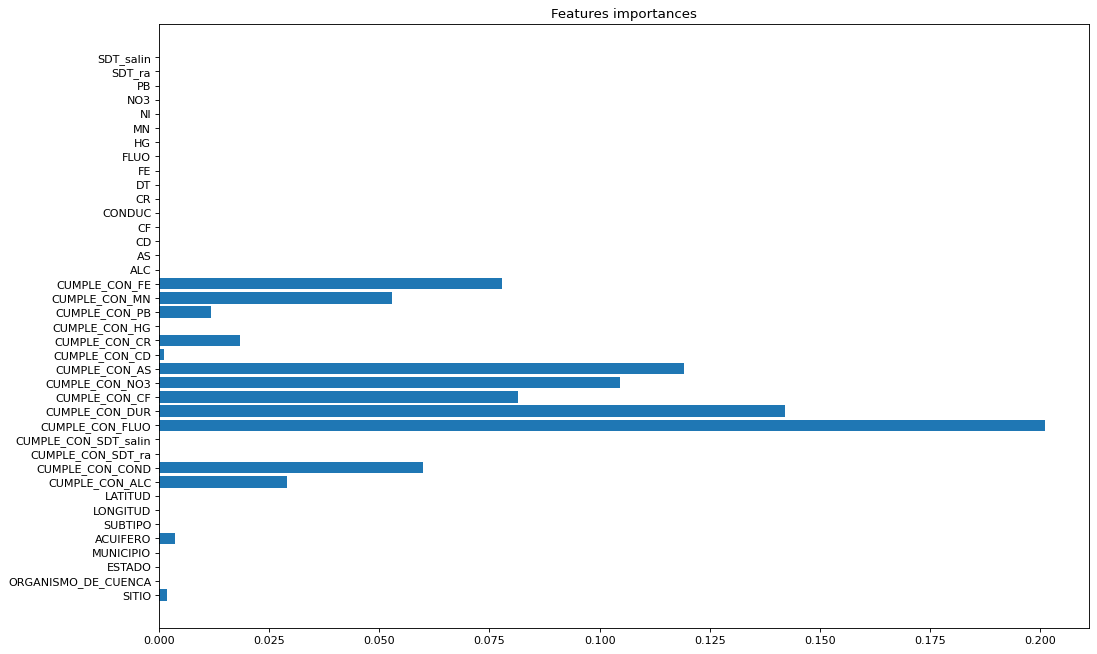

In [23]:
#Importamos el módulo para obtener las features más importantes, por medio de permutation importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Usamos la función permutation importance
importance = permutation_importance(pipeline, X, y_label, n_repeats=10,random_state=1)

figure(figsize = (15, 10), dpi = 80)

#Le pasamos el promedio de la importancia de la feature, seguido del nombre de la feature
for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,v))

#Graficamos el resultado
plt.title("Features importances")
plt.barh(X.columns.to_numpy(),importance["importances_mean"])
plt.show()

# Selecciona las variables de mayor importancia.
Tal como se puede observar, las columnas que hablan de si el agua cumple o no con algún indicador, serán las más importantes al momento de generar nuestro modelo, es por eso que serán nuestras variables de mayor importancia.

In [24]:
most_important=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
df=df[most_important]

Creamos otro pipeline con las variables más importantes

In [25]:
binary_features=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
bin_pipe=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)  

important_features = ColumnTransformer(transformers = [('binpipe', bin_pipe, binary_features)])



Asignamos a **X** las columnas más importantes, sacadas con feature importance, la **y** ya la tenemos en la parte de arriba, guardada dentro de la variable **y_label**.

In [26]:
X=df

Visualizamos como quedan las variables predictoras

In [27]:
X.head()

,CUMPLE_CON_FE,CUMPLE_CON_MN,CUMPLE_CON_PB,CUMPLE_CON_CR,CUMPLE_CON_AS,CUMPLE_CON_NO3,CUMPLE_CON_CF,CUMPLE_CON_DUR,CUMPLE_CON_FLUO,CUMPLE_CON_COND,CUMPLE_CON_ALC
0,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI
3,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI


## Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

Usaremos el 20% de los datos para prueba y el resto para entrenamiento

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.2,random_state=1,stratify=y_label) #stratify lo usamos para dividir los datos balanceados

# Explora que clasificador es el más óptimo, ejemplo:
* Decision trees
* Random forest

Creamos una función donde guardamos los modelos de **Decision Tree** y **Random Forest**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_models(): #creamos una función donde guardamos el modelo
  modelos = list()
  nombres = list()

  # RF - Bosque Aleatorio
  modelos.append(RandomForestClassifier(random_state=0,max_depth=5))

  #DT - Decision Tree
  modelos.append(DecisionTreeClassifier(random_state=0,max_depth=5))

  return modelos

Guardamos dentro de la variable modelos, nuestros modelos creados con **get_models()**

In [30]:
modelos=get_models()

**Evaluamos nuestro modelo con Random Forest** 

In [31]:
pipeline_rf = Pipeline(steps=[('ct',important_features),('m',modelos[0])])
pipeline_rf.fit(X_train,y_train)
yhat_rf=pipeline_rf.predict(X_test)

Obtenemos las métricas de accuracy, precision y recall del modelo

In [32]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

accuracy=accuracy_score(y_test,yhat_rf)
precision=precision_score(y_test, yhat_rf, average='macro')
recall=recall_score(y_test,yhat_rf,average="macro")
print("El accuracy es de:",accuracy)
print("La precision es de:",precision)
print("El recall es de:",recall)

El accuracy es de: 0.9252336448598131
La precision es de: 0.9198099415204678
El recall es de: 0.911832283753466


**Evaluamos nuestro modelo con Decision Tree**

In [33]:
pipeline_dt = Pipeline(steps=[('ct',important_features),('m',modelos[1])])
pipeline_dt.fit(X_train,y_train)
yhat_dt=pipeline_dt.predict(X_test)

Obtenemos las métricas de accuracy, precision y recall del modelo

In [34]:
accuracy=accuracy_score(y_test,yhat_dt)
precision=precision_score(y_test, yhat_dt, average='macro')
recall=recall_score(y_test,yhat_dt,average="macro")
print("El accuracy es de:",accuracy)
print("La precision es de:",precision)
print("El recall es de:",recall)

El accuracy es de: 0.8598130841121495
La precision es de: 0.8685185185185186
El recall es de: 0.8389150532007674


Visualizamos el Decision Tree

[Text(0.6071428571428571, 0.9166666666666666, 'X[17] <= 0.5\ngini = 0.65\nsamples = 854\nvalue = [198, 309, 347]'),
 Text(0.5357142857142857, 0.75, 'X[15] <= 0.5\ngini = 0.625\nsamples = 700\nvalue = [198, 155, 347]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.52\nsamples = 539\nvalue = [78, 114, 347]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.425\nsamples = 476\nvalue = [36, 93, 347]'),
 Text(0.14285714285714285, 0.25, 'X[14] <= 0.5\ngini = 0.366\nsamples = 445\nvalue = [36, 62, 347]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.293\nsamples = 417\nvalue = [36, 34, 347]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.5, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.444\nsamples = 63\nvalue = [42, 21, 0]'),
 Text(0.42857142857142855, 0.25, 'X[6] <= 0.5\ngini = 0.361\nsamples = 5

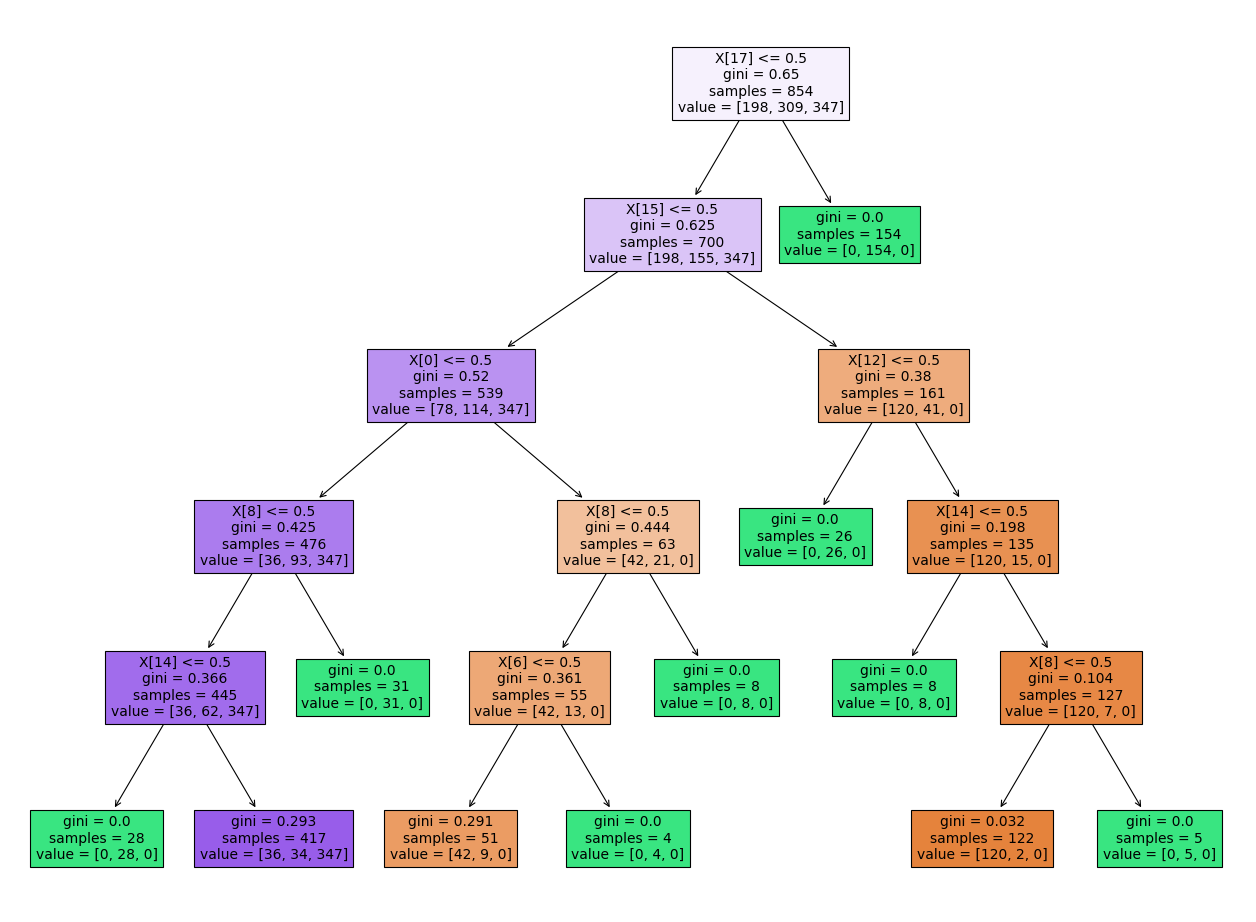

In [35]:
figure(figsize = (20, 15), dpi = 80)

tree.plot_tree(pipeline_dt.named_steps["m"], filled = True)

A primera vista, el modelo de **Random Forest** muestra los mejores resultados, todas las métricas tuvieron un score superior a 0.90

# Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.


Primero generamos el **reporte de clasificación del Decision Tree** para ello utilizamos el módulo **classification report** de Scikit-learn.

In [36]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat_dt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.73      0.77        49
     class 1       1.00      0.78      0.88        78
     class 2       0.81      1.00      0.89        87

    accuracy                           0.86       214
   macro avg       0.87      0.84      0.85       214
weighted avg       0.88      0.86      0.86       214



El resultado del accuracy en este modelo es de **0.86**

Ahora hacemos el **reporte de clasificación del Random Forest**

In [37]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.84      0.85        49
     class 1       1.00      0.91      0.95        78
     class 2       0.91      0.99      0.95        87

    accuracy                           0.93       214
   macro avg       0.92      0.91      0.91       214
weighted avg       0.93      0.93      0.93       214



El score de accuracy es de **0.93**, para el modelo de Random Forest, lo que indica un mejor performance en comparación al modelo del Decision Tree.

Graficamos la Curva Precision-Recall del **Decision Tree**

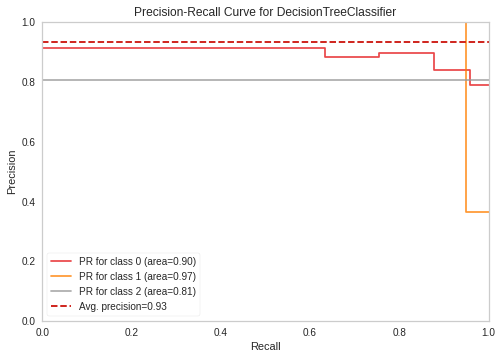

In [38]:
from yellowbrick.classifier import PrecisionRecallCurve
prcurve = PrecisionRecallCurve(
    pipeline_dt,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()

Obtenemos que el promedio de la precision es de **0.93** para el modelo de **Decision Tree**

Ahora sacamos la Curva Precision-Recall del modelo con **Random Forest**

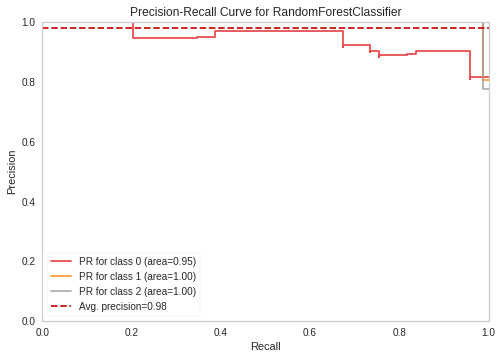

In [39]:
prcurve = PrecisionRecallCurve(
    pipeline_rf,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()

El promedio de la métrica precision es de 0.98 para el modelo con **Decision Tree**

# Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Definimos una función para graficar la matriz de confusión.

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def mi_cm(yreal, ypred,title):
  cm=confusion_matrix(yreal, ypred)

  plt.figure(figsize=(6,4))
  plt.title("Matriz de Confusión "+title)
  ax = sns.heatmap(cm, annot=True, fmt='', cmap="viridis", cbar=True)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

Ahora usamos esa función para obtener la **matriz de confusión para Decision Tree**

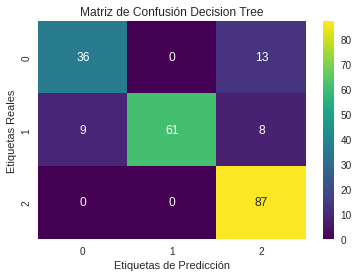

In [58]:
mi_cm(y_test,yhat_dt,"Decision Tree")

Hacemos uso de la misma función para obtener la **matriz de confusión para Random Forest**

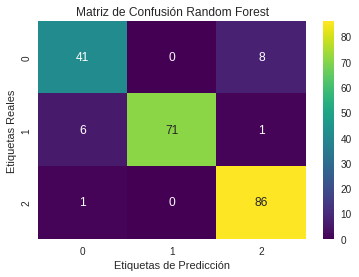

In [59]:
mi_cm(y_test,yhat_rf,"Random Forest")

Graficamos las curvas de aprendizaje del modelo con **Random Forest**, para ello creamos dos funciones para poder usar recall y precision con el paramétro average="macro", adicionalmente como haremos uso de **Make Scorer** en la función **mi_ModeloYCurvas**, necesitaremos convertir el método accuracy_score a una función llamada mi_accuracy.

In [43]:
from sklearn.metrics import make_scorer

def mi_recall(y_real,y_pred):
  recall=recall_score(y_real,y_pred,average='macro')
  return recall

def mi_precision(y_real,y_pred):
  precision=precision_score(y_real,y_pred,average='macro')
  return precision

def mi_accuracy(y_real,y_pred):
  accuracy=accuracy_score(y_real,y_pred)
  return accuracy

Definimos la función con la cual nuestros datos se graficarán

In [44]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,scoring_name):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(scoring_name)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

Creamos otra función donde haremos uso de validación cruzada para obtener la curva de aprendizaje

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold, learning_curve

def mi_ModeloYCurvas(Xin,modelo,scorer,scoring_name):

       mi_pipe =  Pipeline(steps=[('ct',important_features),('m',modelo)])
       mi_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)     
       delta_train_sz = np.linspace(0.1,1.0,40)
       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring=make_scorer(scorer),
                                                        random_state=10)
       
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,scoring_name)

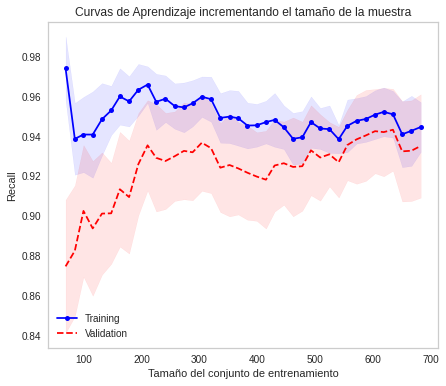

In [46]:
mi_ModeloYCurvas(X_train,modelos[0],mi_recall,"Recall")

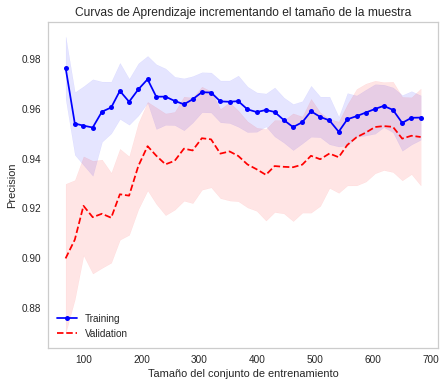

In [47]:
mi_ModeloYCurvas(X_train,modelos[0],mi_precision,"Precision")

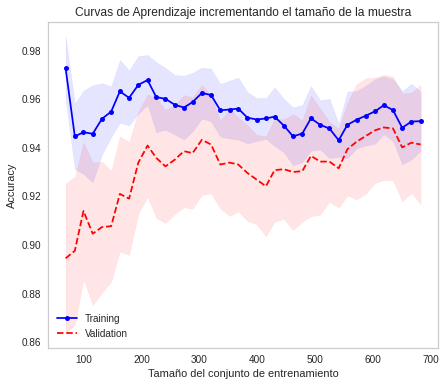

In [48]:
mi_ModeloYCurvas(X_train,modelos[0],mi_accuracy,"Accuracy")

Del comportamiento de las 3 gráficas se puede concluir que el modelo no se encuentra sobreentrenado, dado que la brecha entre el conjunto de entrenamiento y el de validación no es pronunciado y a medida que aumenta el número de muestras, la brecha empieza a cerrarse.

Ahora sacamos las curvas de aprendizaje del **Decision Tree**

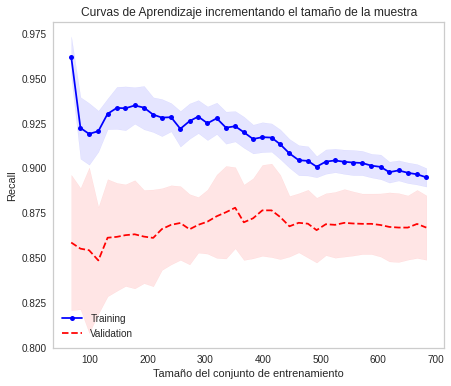

In [49]:
mi_ModeloYCurvas(X_train,modelos[1],mi_recall,"Recall")

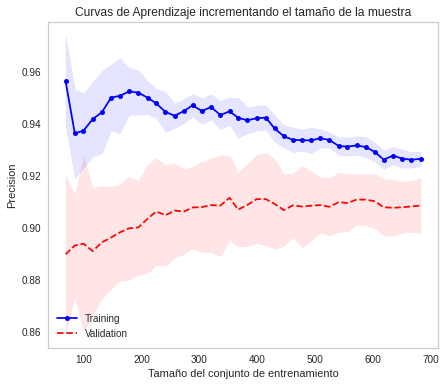

In [50]:
mi_ModeloYCurvas(X_train,modelos[1],mi_precision,"Precision")

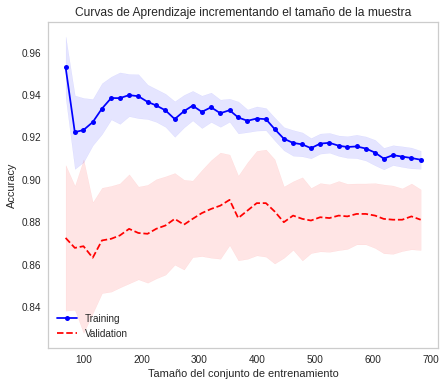

In [51]:
mi_ModeloYCurvas(X_train,modelos[1],mi_accuracy,"Accuracy")

De las gráficas anteriores se obtiene que el modelo con **Decision Tree** tiene un performance bueno, pero no se compara al obtenido con el otro modelo, por lo que **se deberá elegir el modelo con Random Forest**.

# Principales hallazgos y conclusiones del experimento

* De la realización del reto queda claro que el modelo K-means, no es el adecuado 
para clasificar la calidad del agua, dado que las coordenadas no influyen en la calidad del agua, por lo cual el método del codo no nos será de utilidad para identificar clusters. 

* En total se cuenta con un 40% de mantos subterráneos con semáforo verde, mientras que en el color rojo se encuentra el 36% y el resto en color amarillo.

* Las clases de la variable semáforo se encuentran muy pegadas, por lo que requieren de modelos de tipo ensemble para su clasificación.

* Las variables que más le aportarán a nuestro modelo, serán las relacionadas a si el agua cumple o no con algún indicador, dado que estas servirán como patrones que a simple vista no se ven, pero indican la calidad del agua.

* El clasificador más óptimo será el de **Random Forest**, dado que en todos los scores de diferentes métricas como "accuracy", "recall" y "precision" muestra mejores resultados en comparación al modelo del **Decision Tree**, también lo confirma la Curva Precision-Recall, con una media de 0.98 en la precision del modelo con Random Forest en comparación al 0.93 del Decision Tree, no sólo eso sino que además la matriz de confusión muestra que el modelo con Random Forest clasifica mejor los Verdaderos Positivos, Falsos Positivos, Falsos Negativos y Verdaderos Negativos.

* La curva de aprendizaje muestra que el modelo con Random Forest tiene mejores resultados en todas las métricas utilizadas (Accuracy, Recall y Precision), además de no mostrar un sobreentrenamiento, en tanto que la curva de aprendizaje del Decision Tree, si bien nos muestra que tiene buenos resultados, no se compara a los resultados obtenidos con el modelo de Random Forest.






 
